In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import scipy.stats 

%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Global minimum found considering the initial guess (x,y) =  [0, -1]  is: 
 (0.090 , -0.713)
Tha value that the function assumes at this point is: -1.032.
Global minimum found considering the initial guess (x,y) =  [0, 1]  is: 
 (-0.090 , 0.713)
Tha value that the function assumes at this point is: -1.032.


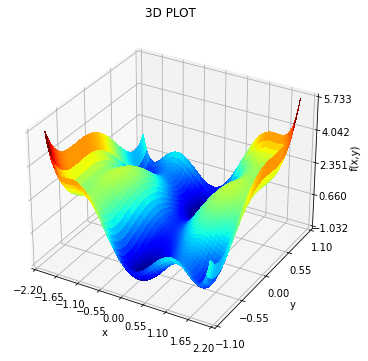

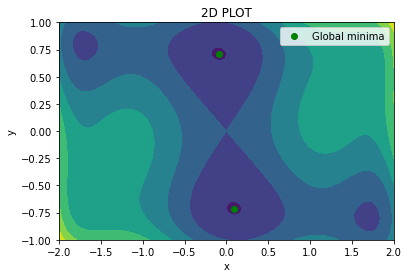

In [8]:
def f(x):
    return (4-2.1*pow(x[0],2)+pow(x[0],4)/3)*pow(x[0],2)+x[0]*x[1]+(4*pow(x[1],2)-4)*pow(x[1],2)

x=np.linspace(-2, 2, 10000)
y=np.linspace(-1, 1, 10000)
X, Y=np.meshgrid(x,y)
Z=f([X, Y])

fig=plt.figure(figsize=(9, 6))
ax=fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=False)
ax.xaxis.set_major_locator(LinearLocator(9))
ax.yaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_locator(LinearLocator(5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('3D PLOT')

fig1=plt.figure(figsize=(6, 4))
ax1=fig1.add_subplot()
ax1.contourf(x,y,Z)
#fig1.colorbar()
ax1.set_title('2D PLOT')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


x0=[0,-1]
res1=optimize.minimize(f, x0,method='L-BFGS-B', tol=1e-20)
print('Global minimum found considering the initial guess (x,y) = ',  x0,' is: \n (%1.3f , %1.3f)' %(res1.x[0],res1.x[1]))
print('Tha value that the function assumes at this point is: %1.3f.' %f([res1.x[0],res1.x[1]]))


x0=[0,1]
res2=optimize.minimize(f, x0,method='L-BFGS-B', tol=1e-20)
print('Global minimum found considering the initial guess (x,y) = ',  x0,' is: \n (%1.3f , %1.3f)' %(res2.x[0],res2.x[1]))
print('Tha value that the function assumes at this point is: %1.3f.' %f([res2.x[0],res2.x[1]]))
    
ax1.plot(res1.x[0], res1.x[1],'o',label='Global minima', color='green')
ax1.plot(res2.x[0], res2.x[1],'o',label='_nolegend_', color='green')
ax1.legend();

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Best parameters for the fitting of max:
 [ 5.73581552  2.29443133 15.77934693 23.09207029]

Best parameters for the fitting of min:
 [  6.16452577  -1.97590082 -61.32094473  52.6492948 ]


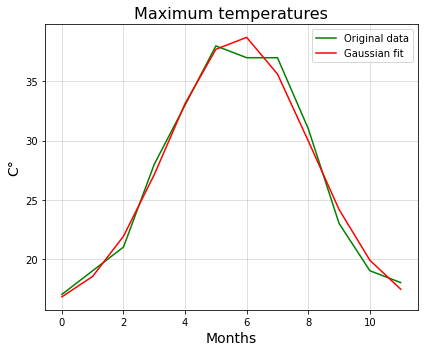

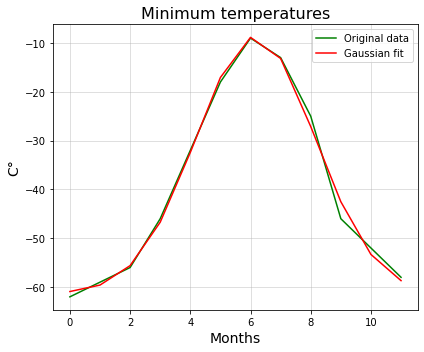

In [20]:
from scipy.stats import norm
from scipy.integrate import trapz 
from scipy.optimize import curve_fit
import math

# Definition of the fitting function.
def gaussian_pdf(x, mean, std, offset, scale):
    return offset+scale*np.exp(-0.5*((x-mean)/std)**2)

# Temperature vectors.
xdata_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
xdata_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Month vector.
months = np.arange(0,12,1)

# Finding best parameters for max temperatures.
popt_max, _ = curve_fit(gaussian_pdf, months, xdata_max, p0=[5, 5, 5, 5])
print('Best parameters for the fitting of max:\n', popt_max)
yopt_max = gaussian_pdf(months, popt_max[0], popt_max[1], popt_max[2], popt_max[3])

# Finding best parameters for min temperatures.
popt_min, _ = curve_fit(gaussian_pdf, months, xdata_min, p0=[5, 5, -30, 5])
print('\nBest parameters for the fitting of min:\n', popt_min)
yopt_min = gaussian_pdf(months, popt_min[0], popt_min[1], popt_min[2], popt_min[3])

# Plot maximum temperatures with the corresponding fit.
fig1 = plt.subplots(tight_layout=True, figsize = (6,5))
plt.plot(months, xdata_max, 'g')
plt.plot(months, yopt_max, 'r')
plt.xlabel('Months', size=14)
plt.ylabel('C°', size=14)
plt.title('Maximum temperatures', size=16)
plt.legend(['Original data', 'Gaussian fit'])
plt.grid(alpha=0.5)

# Plot minimum temperatures with the corresponding fit.
fig2 = plt.subplots(tight_layout=True, figsize = (6,5))
plt.plot(months, xdata_min, 'g')
plt.plot(months, yopt_min, 'r')
plt.xlabel('Months', size=14)
plt.ylabel('C°', size=14)
plt.title('Minimum temperatures', size=16)
plt.legend(['Original data', 'Gaussian fit'])
plt.grid(alpha=0.5)

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [10]:
#import pickle
import pandas as pd
import numpy as np

data = pd.DataFrame(np.load('residuals_261.pkl',allow_pickle=True).item())
data = data[data['residuals'] > -10]

data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


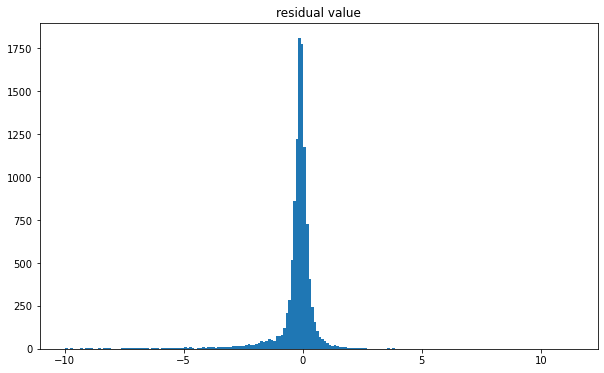

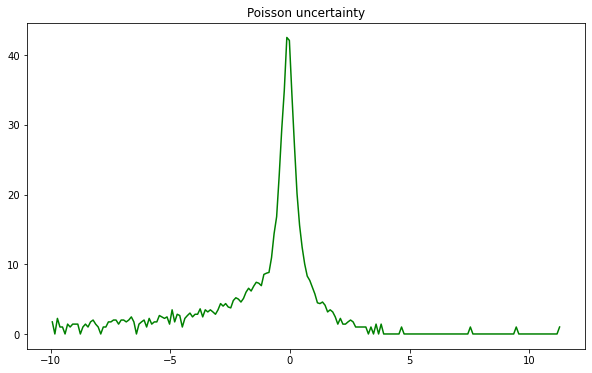

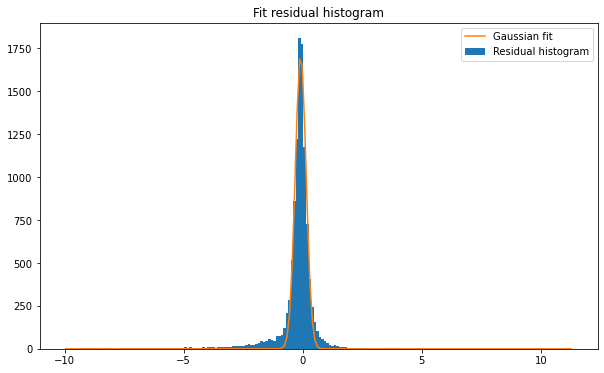

In [14]:
from numpy import exp

def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)

fig, ax = plt.subplots(figsize=(10, 6))
h, bins, _ = plt.hist(data['residuals'], bins=200)

bin_centres = (bins[:-1] + bins[1:])/2.

ax.set_title('residual value')

fig, ax = plt.subplots(figsize=(10, 6))
sig_y = np.sqrt(np.abs(h))
ax.plot(bin_centres, sig_y, color="green")
ax.set_title('Poisson uncertainty')


par, par_cov = optimize.curve_fit(gaussian, bin_centres, h, full_output=False)

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(data['residuals'], bins=200, label='Residual histogram')
plt.plot(bin_centres, gaussian(bin_centres, *par), label='Gaussian fit')

ax.set_title('Fit residual histogram')
ax.legend()

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

C:\Users\hp\AppData\Local\Temp/ipykernel_18428/2996503751.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(time_short, f1(time_short, *res_f), 'r--', linewidth=3, color='red')


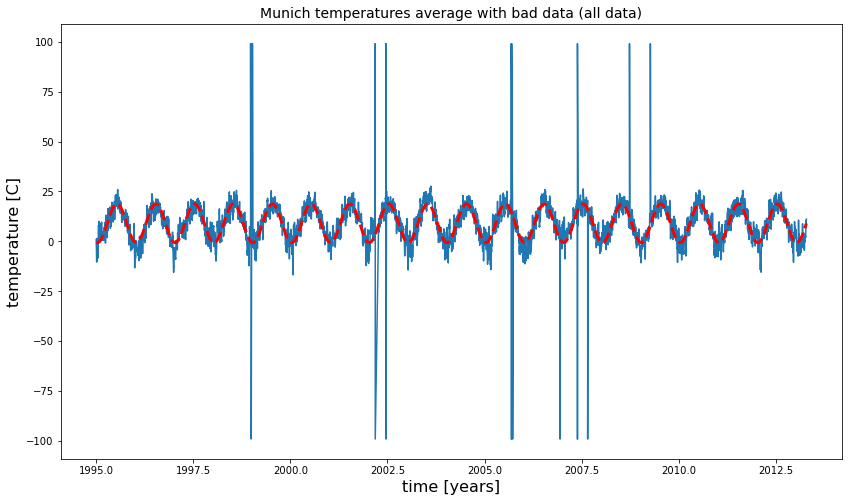

C:\Users\hp\AppData\Local\Temp/ipykernel_18428/2996503751.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(time_short2, f1(time_short2, *res2), 'r--', linewidth=3, color='red')


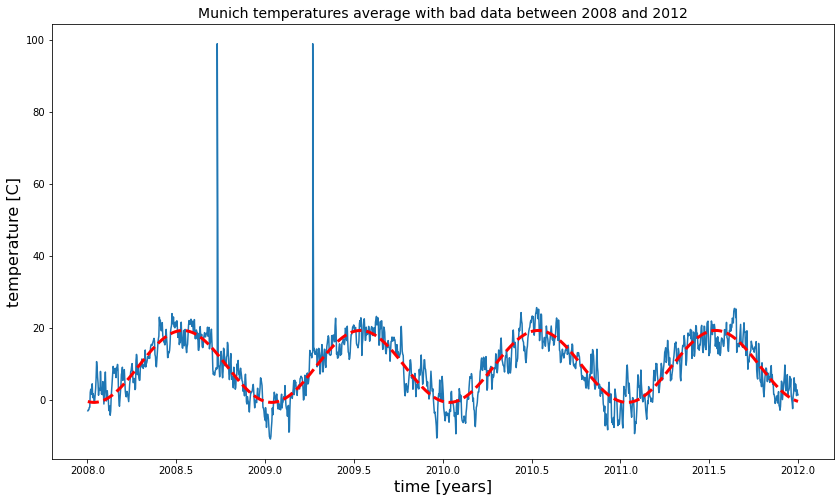

C:\Users\hp\AppData\Local\Temp/ipykernel_18428/2996503751.py:107: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(time_short2, f1(time_short2, *res2), 'r--', linewidth=3, color='red')



best parameters of the fit between 2008 and 2012

amplitude (temperature range):  -9.98813368108493 shift in time: -0.2333476048431593 constant background:  9.384114863029373

the average temperature in Munich between 2008 and 2012 is:  9.384097734976043

the average hottest temperature in Munich between 2008 and 2012 is:  19.372248544114303

the average coldest temperature in Munich between 2008 and 2012 is:  -0.6040188180555575

the b parameter -0.2333476048431593 is the time shift with respect to a cosine law, it represent the shift of the max temperature with respect to January,but since the phenomena 
is periodic, the max temperature is achived at 1 year + (-) this time, so at 0.7666523951568407 years, that corresponds to the 8-th month, August

3 vs 4 parameters:
CL: 0.730 , additional parameter necessary: NO


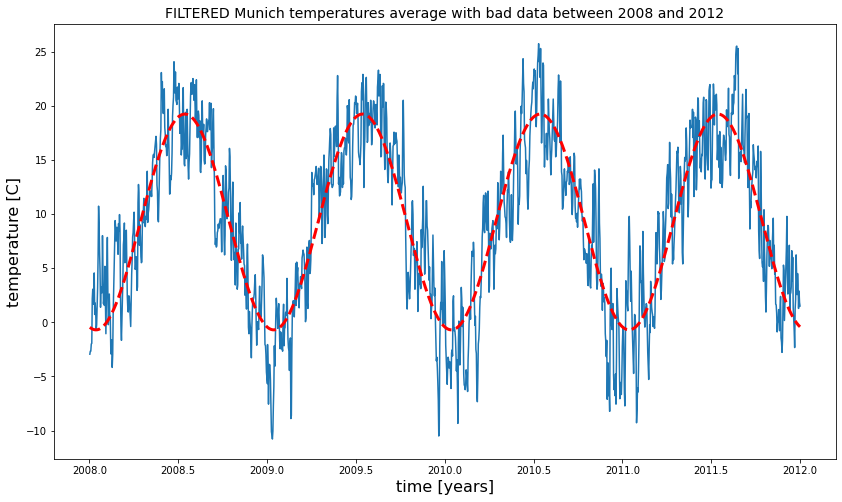

In [17]:
import pandas as pd
from scipy import optimize
import math
from scipy.stats import f

df=pd.read_table('munich_temperatures_average_with_bad_data.txt',sep=" ",header=None)
df.columns= ["time", "temp"]

time=df.iloc[:,0]
time=np.array(time)
temp=df.iloc[:,1]
temp=np.array(temp)

def f1(t, a, b, c):                              # f fit function
    return a*np.cos(2*math.pi*t+b)+c
def g(t, a, b, c, d):                              # g fit function
    return a*np.cos(2*math.pi*t*b+c)+d

fig1 = plt.figure(figsize=(14,8))   # first plot of all data
plt.plot(time, temp)
plt.xlabel('time [years]', size=16)
plt.ylabel('temperature [C]',size=16)
plt.title('Munich temperatures average with bad data (all data)', size=14)



time_short=np.linspace(min(time), max(time), len(time))
res_f, cov_f = optimize.curve_fit(f1, time, temp, p0 = [20, 20, 8])
plt.plot(time_short, f1(time_short, *res_f), 'r--', linewidth=3, color='red')
plt.show()

# end of part 1 with f
# start of part 2

df2=df[(df.time > 2008) & (df.time < 2012)]     # filtering the data for the second plot
time2=df2.iloc[:,0]
time2=np.array(time2)
temp2=df2.iloc[:,1]
temp2=np.array(temp2)

fig2 = plt.figure(figsize=(14,8))    # second plot
plt.plot(time2, temp2)
plt.xlabel('time [years]', size=16)
plt.ylabel('temperature [C]',size=16)
plt.title('Munich temperatures average with bad data between 2008 and 2012', size=14)

time_short2=np.linspace(min(time2), max(time2), len(time2))
res2, cov2 = optimize.curve_fit(f1, time2, temp2, p0=[19, +0.5, -0.5])
plt.plot(time_short2, f1(time_short2, *res2), 'r--', linewidth=3, color='red')
plt.show()


print('\nbest parameters of the fit between 2008 and 2012')
print('\namplitude (temperature range): ',res2[0], 'shift in time:',res2[1],'constant background: ',res2[2])
print('\nthe average temperature in Munich between 2008 and 2012 is: ', np.mean(temp2))
print('\nthe average hottest temperature in Munich between 2008 and 2012 is: ', res2[2]-res2[0])
print('\nthe average coldest temperature in Munich between 2008 and 2012 is: ', res2[2]+res2[0])
print('\nthe b parameter',res2[1],'is the time shift with respect to a cosine law, it represent the shift of the max temperature with respect to January,but since the phenomena ')
print('is periodic, the max temperature is achived at 1 year + (-) this time, so at', 1+(res2[1]), 'years, that corresponds to the 8-th month, August\n')

# end of part 2 with f
# start of part with more parameters




res_g, cov_g = optimize.curve_fit(g, time, temp, p0 = [20, 1, 20, 8])
#print(res_f)
#print(res_g)

y_f=f1(time_short, *res_f)
y_g=g(time_short, *res_g)

RSS_f=np.sum((temp-y_f)**2)
RSS_g=np.sum((temp-y_g)**2)

N=len(time)

#print(RSS_f,RSS_g)

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


print("3 vs 4 parameters:")
cl_1_vs_2 = Ftest(RSS_f, RSS_g, 3, 4, N, verbose=True)



df2=df[(df.time > 2008) & (df.time < 2012) & (df.temp < 26)]     # filtering the data even in the temperature domain
time2=df2.iloc[:,0]
time2=np.array(time2)
temp2=df2.iloc[:,1]
temp2=np.array(temp2)

fig2 = plt.figure(figsize=(14,8))    # second plot
plt.plot(time2, temp2)
plt.xlabel('time [years]', size=16)
plt.ylabel('temperature [C]',size=16)
plt.title('FILTERED Munich temperatures average with bad data between 2008 and 2012', size=14)

time_short2=np.linspace(min(time2), max(time2), len(time2))
res2, cov2 = optimize.curve_fit(f1, time2, temp2, p0=[10, +0.5, -0.2])
plt.plot(time_short2, f1(time_short2, *res2), 'r--', linewidth=3, color='red')
plt.show()